In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
from ipywidgets import (
    FloatSlider, 
    IntSlider, 
    interact, 
    interactive, 
    fixed, 
    interact_manual
)

from fdrc.artificial_data import make_gaussian_hypotheses, make_ar_hypotheses
from fdrc.plots import plot_dataset


def show_gaussian_hypothesis(
    anomaly_ratio=0.01, 
    signal_strength=10, 
    data_noise=1.0, 
    size=500
):
    dataset = make_gaussian_hypotheses(
        size=size,
        anomaly_ratio=anomaly_ratio,
        data_noise=data_noise,
        signal_strength=signal_strength
    )
    return plot_dataset(dataset)


def show_ar_hypothesis(
    size=500,
    anomaly_ratio=0.1,
    signal_strength=5.0, 
    c=0.0,
    phi=0.9,
    noise=1.0,
    model="simple",
    window_size=10,
):
    dataset = make_ar_hypotheses(
        size=size,
        anomaly_ratio=anomaly_ratio,
        signal_strength=signal_strength,
        c=c,
        phi=phi,
        noise=noise,
        model=model,
        window_size=window_size
    )
    return plot_dataset(dataset)

## Make Gaussian Hypothesis

In [2]:
interact(
    show_gaussian_hypothesis, 
    anomaly_ratio=FloatSlider(min=0, max=0.1, step=0.01, value=0.01, description="anom. ratio"), 
    signal_strength=FloatSlider(min=0, max=10, step=0.1, value=3, description="strength")
);

interactive(children=(FloatSlider(value=0.01, description='anom. ratio', max=0.1, step=0.01), FloatSlider(valu…

## With Increasing Noise

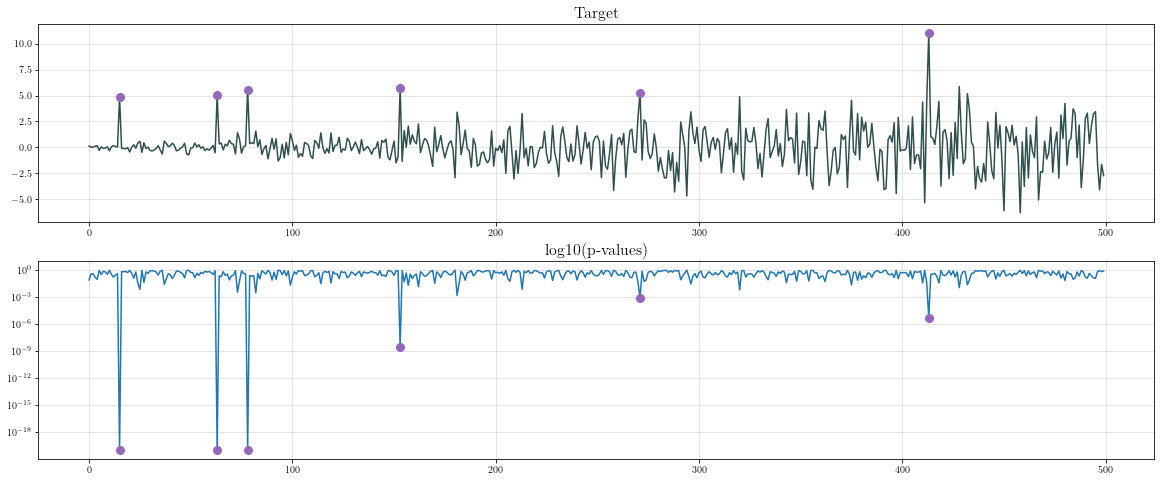

In [3]:
# Noise increases from 1 to 3 at equal steps

show_gaussian_hypothesis(
    anomaly_ratio=0.01, 
    signal_strength=5, 
    data_noise=list(np.linspace(0.1, 3, 500)),
    size=500
)

## With Increasing Anomaly Rate

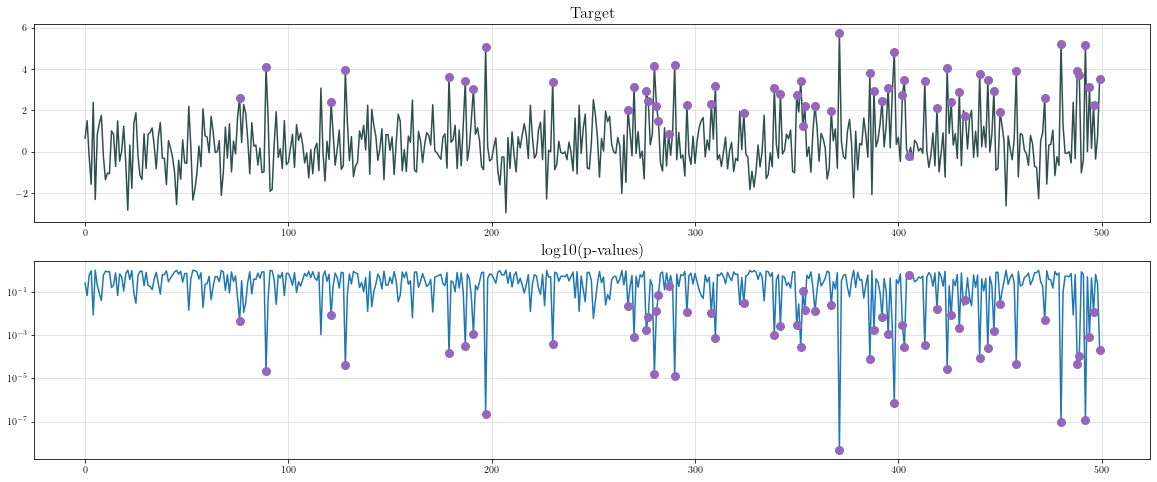

In [4]:
# Anomaly rate increase from 0.01 to 0.1 at equal steps

show_gaussian_hypothesis(
    anomaly_ratio=list(np.linspace(0.001, 0.2, 500)),
    signal_strength=3, 
    size=500
)

## With Increasing Signal Strength

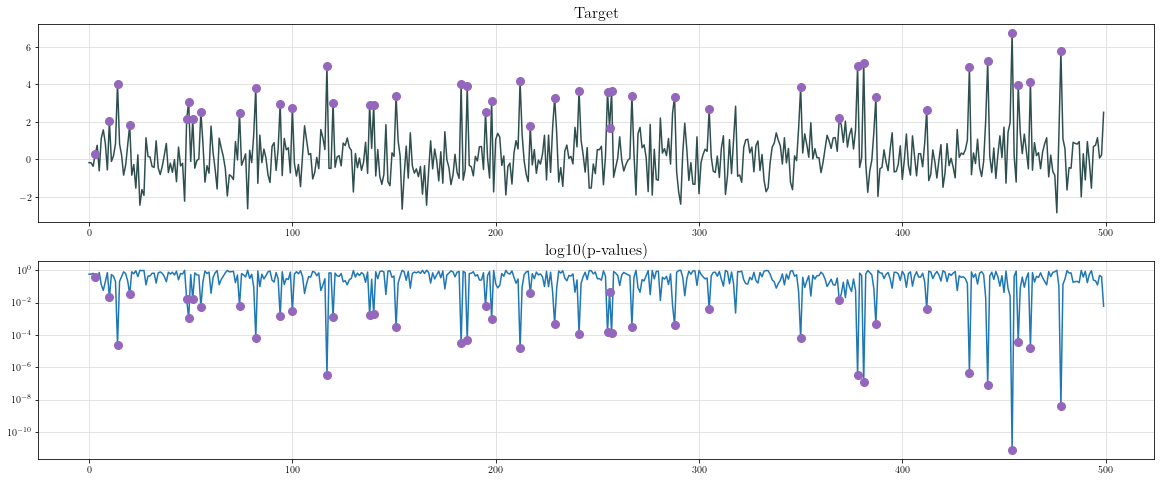

In [5]:
show_gaussian_hypothesis(
    anomaly_ratio=0.1,
    signal_strength=list(np.linspace(2, 5, 500)), 
    size=500
)

## AR Hypothesis

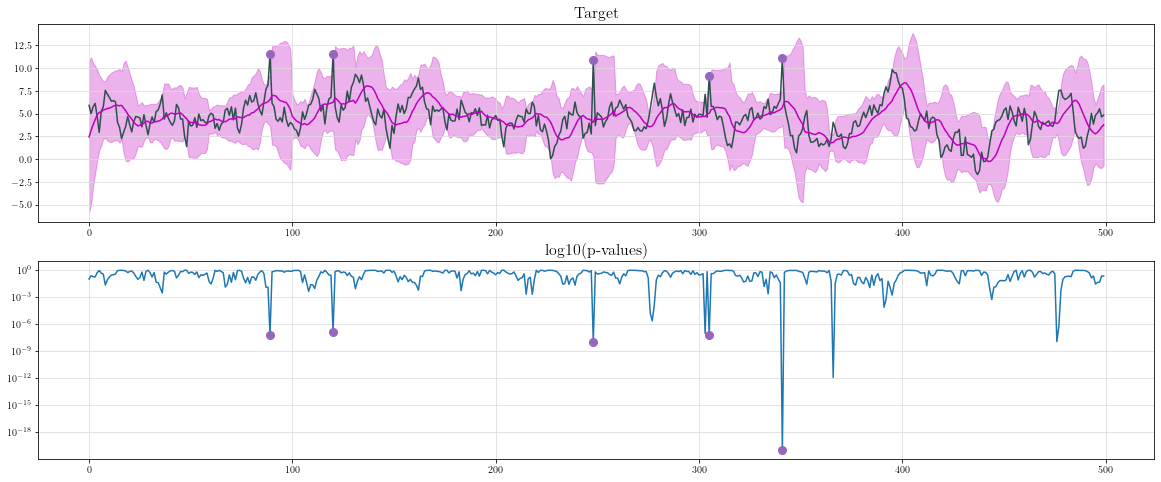

In [6]:
show_ar_hypothesis(
    anomaly_ratio=0.01,
    signal_strength=5.0,
    c=0.5,
    phi=0.9,
    model="sliding_window",
    window_size=10,
)

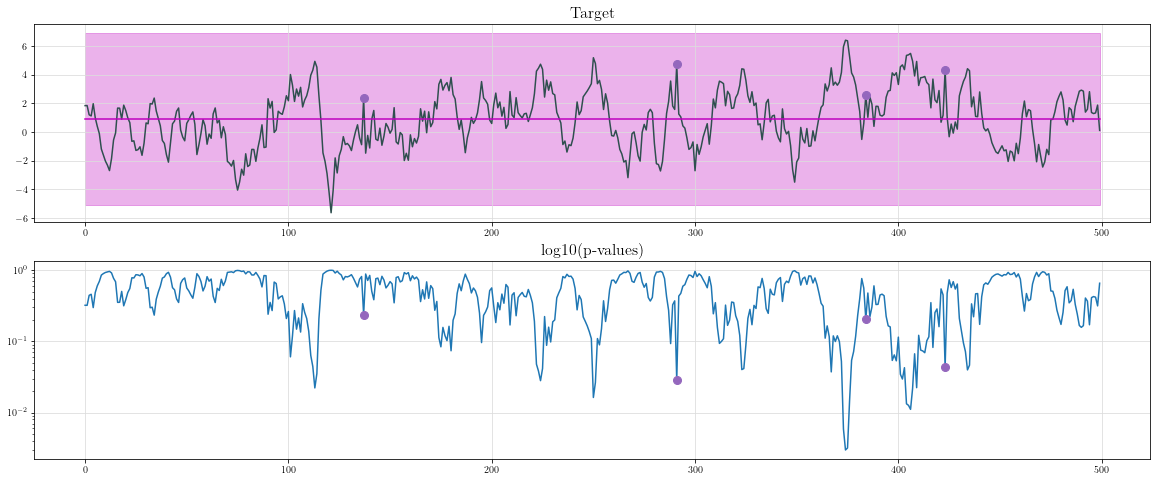

In [7]:
dataset = make_ar_hypotheses(
    size=500,
    anomaly_ratio=0.01,
    c=0.1,
    phi=0.9,
    model="simple",
    window_size=10,
)
plot_dataset(dataset)

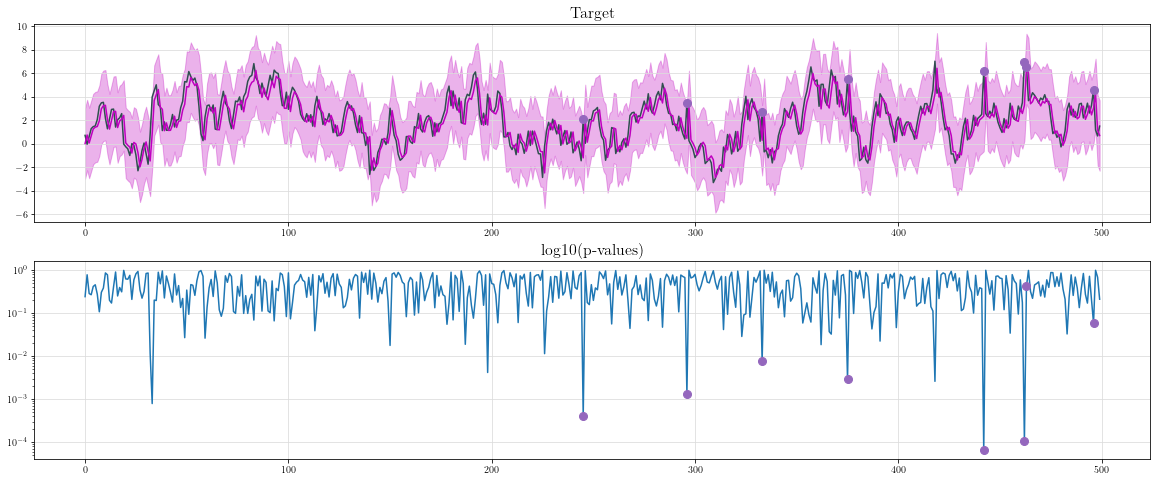

In [8]:
dataset = make_ar_hypotheses(
    size=500,
    anomaly_ratio=0.01,
    c=0.1,
    phi=0.9,
    model="exact",
    window_size=10,
)
plot_dataset(dataset)